# CNN 이진분류 (컬러이미지)
- 개와고양이 데이터셋

In [2]:
!pip install --q ipython-autotime
%load_ext autotime

time: 369 µs (started: 2024-07-01 05:47:04 +00:00)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 778 ms (started: 2024-07-01 05:47:04 +00:00)


## 1.데이터 준비

In [4]:
# !gdown https://drive.google.com/uc?id=1dC-Kso5FonYWtbxtJnJ8_dxO_Jlo8weR

time: 1.28 ms (started: 2024-07-01 05:47:04 +00:00)


In [5]:
# !unzip /content/cats_and_dogs.zip

time: 487 µs (started: 2024-07-01 05:47:04 +00:00)


In [6]:
data_root = '/content/cats_and_dogs'
train_dir = data_root + '/train'
test_dir = data_root + '/test'

print(train_dir)
print(test_dir)

/content/cats_and_dogs/train
/content/cats_and_dogs/test
time: 2.59 ms (started: 2024-07-01 05:47:04 +00:00)


### 데이터 로딩

In [7]:
class_name = ['cats', 'dogs']

time: 530 µs (started: 2024-07-01 05:47:04 +00:00)


In [8]:
import os

train_cats_fnames = os.listdir(train_dir + '/cats')
train_dogs_fnames = os.listdir(train_dir + '/dogs')

time: 3.88 ms (started: 2024-07-01 05:47:04 +00:00)


In [9]:
import PIL

X_train = []
y_train = []

for fname in train_cats_fnames:
    image = PIL.Image.open(train_dir + '/cats/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(0)

len(X_train), len(y_train)

(1300, 1300)

time: 10.5 s (started: 2024-07-01 05:47:04 +00:00)


In [10]:
for fname in train_dogs_fnames:
    image = PIL.Image.open(train_dir + '/dogs/' + fname)
    image = image.resize((224, 224))
    arr = np.array(image)
    X_train.append(arr)
    y_train.append(1)

len(X_train), len(y_train)

(2600, 2600)

time: 10.6 s (started: 2024-07-01 05:47:15 +00:00)


In [11]:
X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train), type(y_train))
print(X_train.shape, y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(2600, 224, 224, 3) (2600,)
time: 174 ms (started: 2024-07-01 05:47:26 +00:00)


## 2.학습, 검증 데이터 분리

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2,
                                                  shuffle=True,
                                                  random_state=42)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(2080, 224, 224, 3) (520, 224, 224, 3)
(2080,) (520,)
time: 530 ms (started: 2024-07-01 05:47:26 +00:00)


In [13]:
X_train.shape

(2080, 224, 224, 3)

time: 10.2 ms (started: 2024-07-01 05:47:26 +00:00)


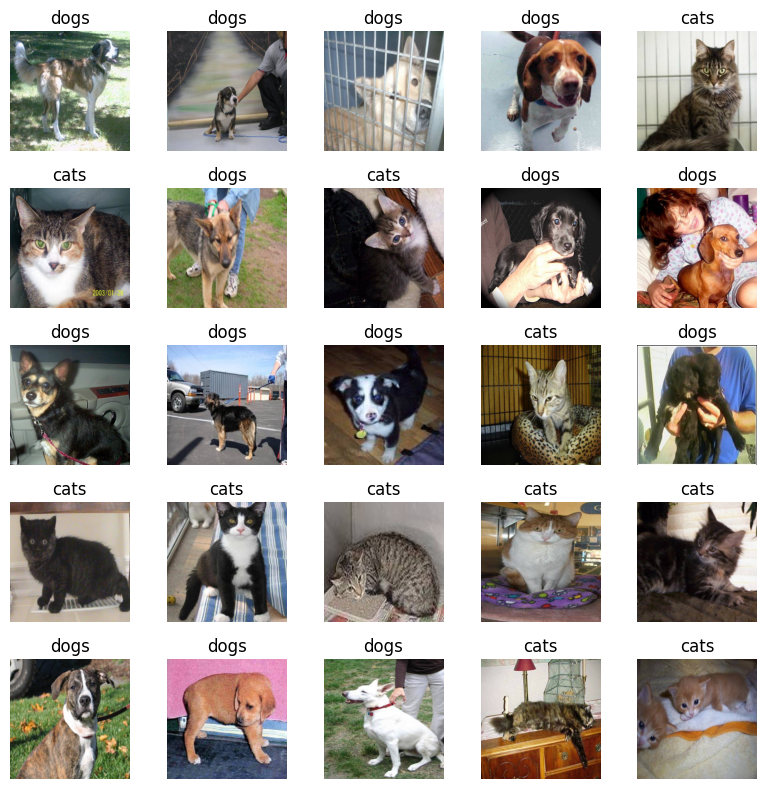

time: 4.56 s (started: 2024-07-01 05:47:26 +00:00)


In [14]:
# np.random.seed(42)
sample = np.random.randint(2080, size=25)

fig = plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
fig.tight_layout()
plt.show()

## 3.전처리

In [15]:
X_train_s = X_train.astype('float')/255.
X_val_s = X_val.astype('float')/255.

time: 2.72 s (started: 2024-07-01 05:47:31 +00:00)


## 4.모델

In [16]:
X_train_s.shape

(2080, 224, 224, 3)

time: 5.01 ms (started: 2024-07-01 05:47:34 +00:00)


In [17]:
from keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=16, kernel_size=3, activation='relu',
                  input_shape=(224, 224, 3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

time: 1.72 s (started: 2024-07-01 05:47:34 +00:00)


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 93312)             0

In [19]:

from keras import layers

model = keras.Sequential()
model.add(layers.Conv2D(filters=16, kernel_size=3, activation='relu',
                  input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


time: 520 ms (started: 2024-07-01 05:47:36 +00:00)


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 64)       

In [21]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 41 ms (started: 2024-07-01 05:47:36 +00:00)


In [22]:
from keras import callbacks

es = callbacks.EarlyStopping(monitor="val_loss",patience=5)
ckpt_path = './temp/cats_dogs.ckpt'
ckpt = keras.callbacks.ModelCheckpoint(
    ckpt_path,
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True)

time: 731 µs (started: 2024-07-01 05:47:36 +00:00)


In [23]:
EPOCHS = 20
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=[es, ckpt],
                    validation_data=(X_val_s, y_val))

Epoch 1/20
65/65 [==============================] - 13s 60ms/step - loss: 0.7104 - accuracy: 0.5327 - val_loss: 0.6611 - val_accuracy: 0.5212
Epoch 2/20
65/65 [==============================] - 3s 44ms/step - loss: 0.6591 - accuracy: 0.6024 - val_loss: 0.6080 - val_accuracy: 0.6404
Epoch 3/20
65/65 [==============================] - 3s 44ms/step - loss: 0.6014 - accuracy: 0.6654 - val_loss: 0.5557 - val_accuracy: 0.7327
Epoch 4/20
65/65 [==============================] - 2s 35ms/step - loss: 0.5310 - accuracy: 0.7279 - val_loss: 0.5564 - val_accuracy: 0.7288
Epoch 5/20
65/65 [==============================] - 2s 36ms/step - loss: 0.4346 - accuracy: 0.8120 - val_loss: 0.5805 - val_accuracy: 0.7365
Epoch 6/20
65/65 [==============================] - 2s 35ms/step - loss: 0.3449 - accuracy: 0.8466 - val_loss: 0.6648 - val_accuracy: 0.7038
Epoch 7/20
65/65 [==============================] - 2s 35ms/step - loss: 0.2161 - accuracy: 0.9067 - val_loss: 0.8499 - val_accuracy: 0.7115
Epoch 8/20
6

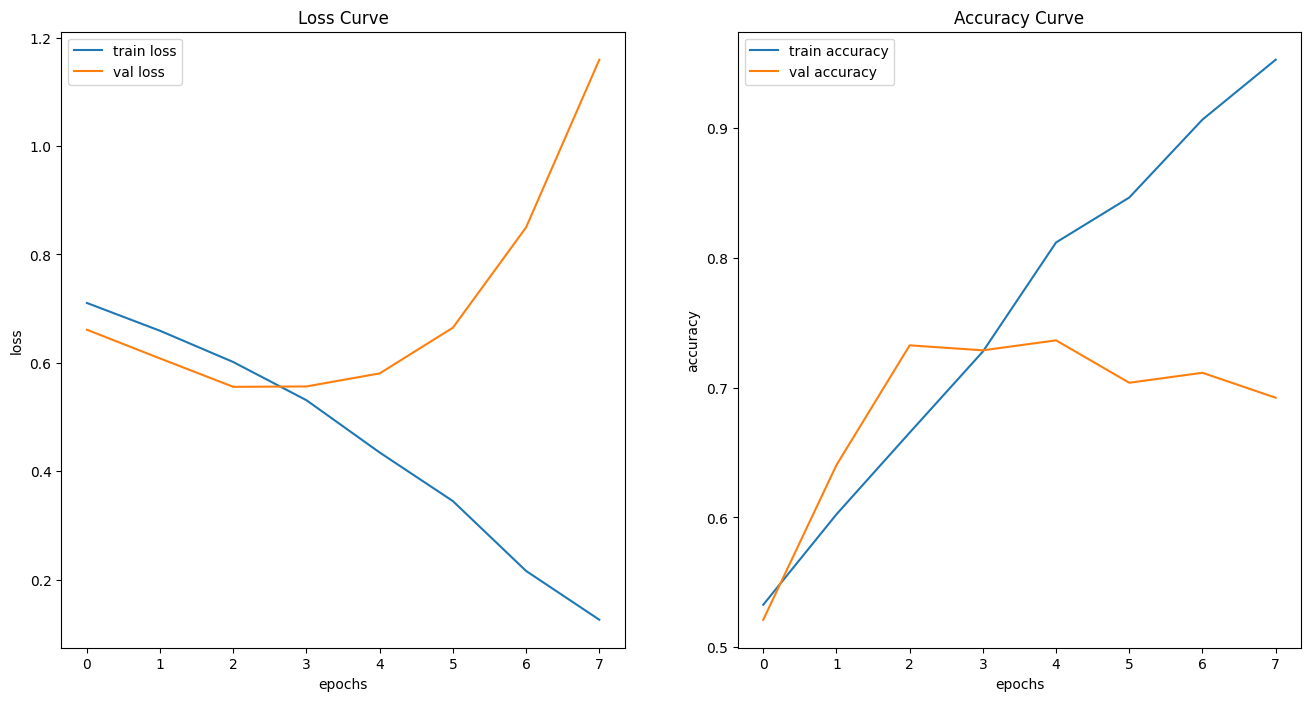

time: 13.3 s (started: 2024-07-01 05:48:13 +00:00)


In [24]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

In [28]:
# 베스트 체크포인트 로딩...

model.load_weights(ckpt_path)

time: 191 ms (started: 2024-07-01 05:52:15 +00:00)


## 5.검증

In [27]:
# 테스트데이터 전처리
# 평가(메트릭스)

time: 350 µs (started: 2024-07-01 05:51:15 +00:00)


time: 13.3 s (started: 2024-07-01 05:48:13 +00:00)


In [25]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

# print_metrics(y_test, y_pred, aver='macro')

time: 1.08 ms (started: 2024-07-01 05:48:27 +00:00)


time: 18.5 ms (started: 2024-07-01 05:48:27 +00:00)


time: 30.9 ms (started: 2024-07-01 05:48:27 +00:00)


time: 47.1 ms (started: 2024-07-01 05:48:27 +00:00)


time: 60.6 ms (started: 2024-07-01 05:48:27 +00:00)


time: 70.1 ms (started: 2024-07-01 05:48:27 +00:00)
